# Perceptrones y redes neuronales

Durante los cuadernillos anteriores hemos trabajado con modelos de aprendizaje supervisado clásicos: el KNN, los árboles de decisión y las SVM. En este cuarto cuadernillo de aprendizaje supervisado, veremos los perceptrones y las redes neuronales.

Realmente, perceptrón y red neuronal son ideas distintas, veamos un poco de teoría primero.

## Introducción teórica

Un perceptrón es una solución de regresión lineal. Este tipo de modelos matemáticos buscan la recta perfecta que permita asignar a cada instancia (valores X) un valor objetivo (valores Y). Para ello, toma todas las columnas como parámetros de entrada ($x_1, x_2, ..., x_n$) y genera un resultado ($y$).

En este problema, los únicos parámetros que pueden ajustarse son **los pesos** de cada variable (al crear un recta --o hiperplano, porque tenemos varios $x_i$--, necesitamos ajustar la componente que los acompaña) y **el intercepto**, que el es valor independiente de la ecuación.

Poniendo todo sobre un dibujo, que siempre es más descriptivo, podemos representar una recta cualquiera, por ejemplo ```y = 2x + 1```.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
x = np.arange(0, 100)
y = x * 2 + 1

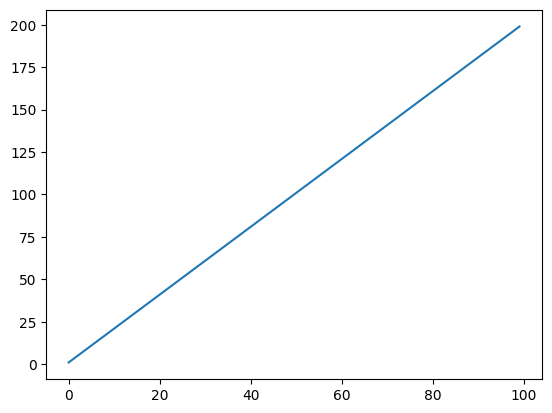

In [ ]:
plt.plot(x, y);

En este caso **TAN** sencillo, mis valores X representan una sola _feature_ ($x_1$) y mis valores Y reprensentan la regresión de mi modelo.

También podemos representar planos, por ejemplo z = x + y + 5

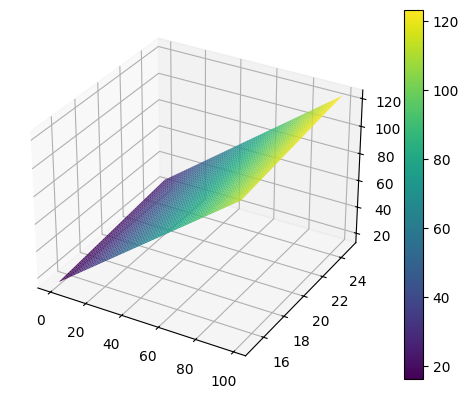

In [ ]:
x = np.arange(0, 100)
y = np.arange(15, 25, step=0.1)
x, y = np.meshgrid(x, y) # fusiono estas dos dimensiones para poder representar mi figura

z = np.add(x, y, np.ones_like(x) * 5.0) # esto es un plano (ver output)

# creo mi figura
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, z, cmap='viridis')
fig.colorbar(surf)
plt.show()

Esta idea puede aumentarse a las dimensiones que se desee.

Este modelo tan sencillo (el que intenta buscar el hiperplano) que define la metodología de regresión en matemáticas es la simulación perfecta de una neurona artificial. Estas _neuronas artificiales_ toman el nombre de **perceptrones**.

Claro. Imagínate que cada una de las entradas (esas que representamos como $x_1, x_2, ..., x_n$, las _features de nuestro modelo) son las **dendritas** de la neurona (las conexiones de entrada) y que la salida (el objetivo) es el **axón**. El resto es trabajo para la imaginación.

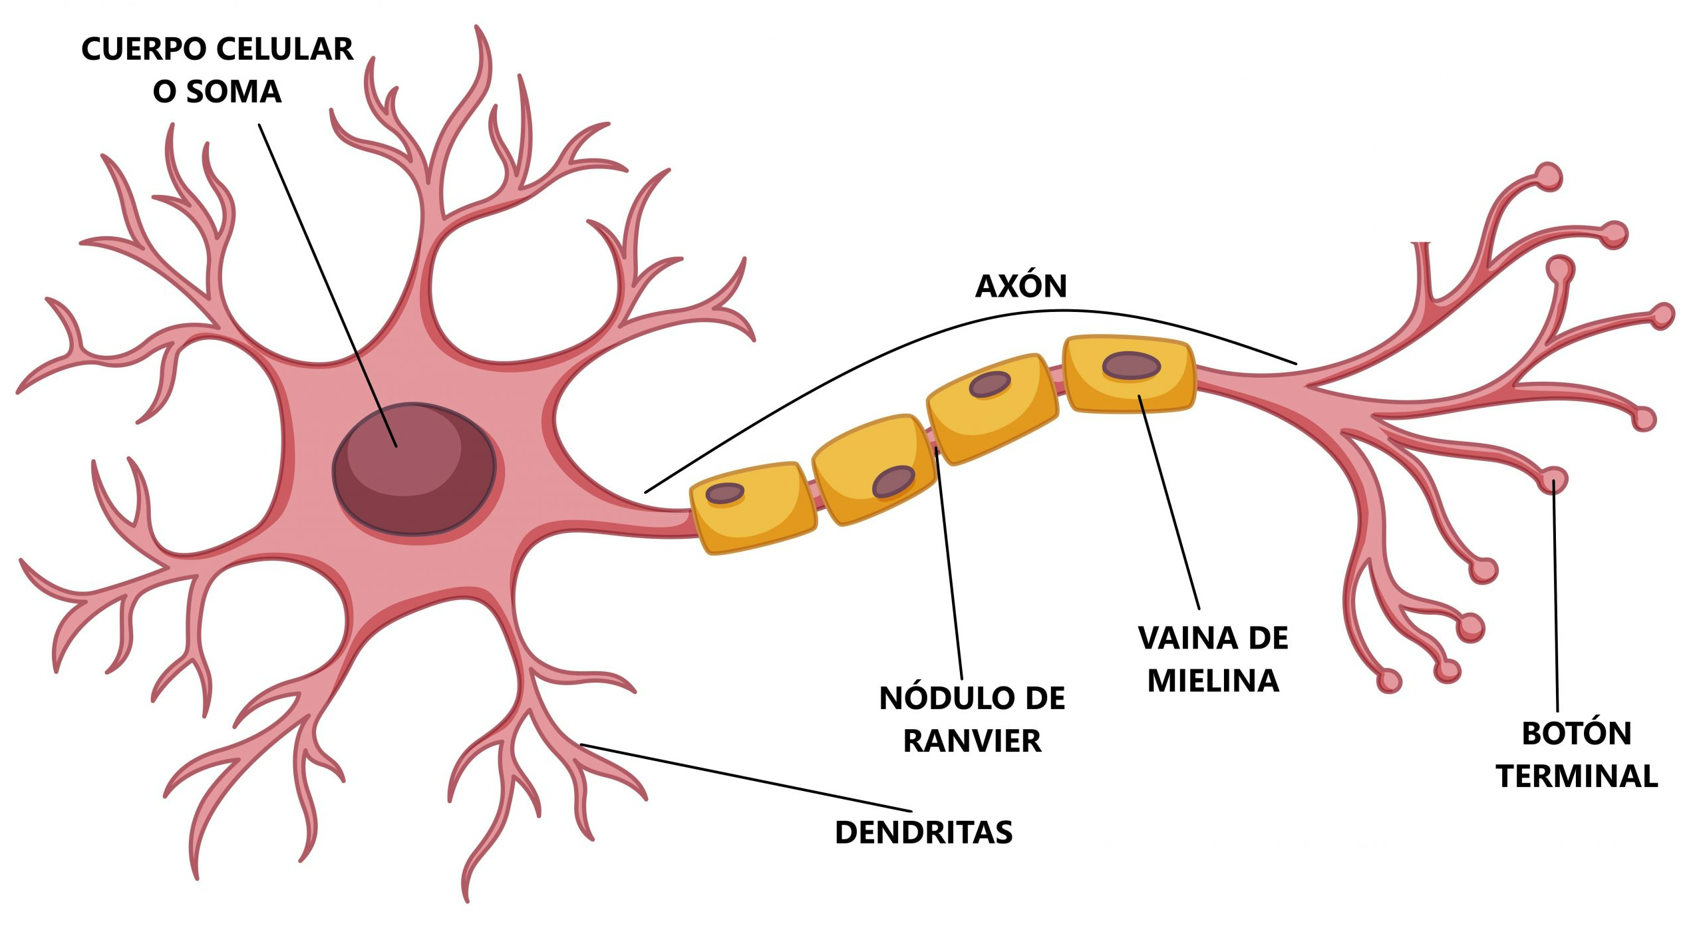

Aunque el **intercepto** podría entenderse como una **dendrita** más, preferimos _dejarlo fuera_ y llamarlo **bias** (sesgo), dado que es un parámetro **NO** ajustable por el **perceptrón**.

Aunque parezca evidente que la salida del **perceptrón** debiera ser un número real, la realidad es que, después del cálculo, se aplica una función que filtra el valor, devolviendo una clase finalmente (es decir, están diseñados para hacer clasificación binaria).

Los perceptrones, por sí mismos, son modelos bastante toscos. Veamos un ejemplo de clasificación binaria. Queremos predecir, a partir de distintas medidas médicas, si el paciente tendrá cancer de mama.

In [ ]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
_df = pd.DataFrame(data["data"], columns=data["feature_names"])
tarjet = pd.DataFrame(data["target"], columns=["is_benign"])
df = pd.concat([_df, tarjet], axis=1)

Supongamos que queremos predecir el áren (```mean_area```).

In [ ]:
from sklearn.model_selection import train_test_split

random_seed = 33

train, test = train_test_split(df, test_size=0.2, random_state=random_seed)

X_train, y_train = train.drop(columns="is_benign"), train["is_benign"]
X_test, y_test = test.drop(columns="is_benign"), test["is_benign"]

Voy a estandarizar los datos. Los perceptrones también se ven afectados ante distintas escalas.

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler().fit(X_train)
X_train_std = ss.transform(X_train)
X_test_std = ss.transform(X_test)

Ahora entreno un modelo. Al ser una clasificación, usaré la métrica **precission**.

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import precision_score

In [ ]:
model = Perceptron().fit(X_train_std, y_train)
pred = model.predict(X_train_std)
print("Entrenamiento: ", precision_score(y_train, pred))

pred = model.predict(X_test_std)
print("Testeo: ", precision_score(y_test, pred))

Entrenamiento:  0.9824561403508771
Testeo:  0.9594594594594594


Como ves, el resultado es bastante bueno (cómo se nota que los datos están preparados).

## La unión hace la fuerza

Como solo con un **perceptrón** obtenemos un resultado malo, vamos a probar a unirlos. Esto es: cogeremos el resultado de uno de nuestros perceptrones y se lo daremos a otro perceptrón como nuevo parámetro de entrada. De esta forma, crearemos capas de perceptrones que pasarán la información a la siguiente capa de la red.

Como un perceptrón simulaba el comportamiento de una neurona, a esta red la llamaremos **red neuronal**.

Sin embargo, las matemáticas se ponen en medio. Como los perceptrones simulan regresiones lineales, la combinación lineal de regresiones lineales es también una regresión lineal. Es decir: si concateno regresiones lineales es como si hiciese una regresión lineal _a lo bestia_, pero reducible a un solo perceptrón (es decir, tenemos el mismo problema).

Para solvertar este inconveniente, tenemos que romper la linealidad de este problema, así que utilizaremos una **función de activación** (en la imagen de la neurona, la mielina), que permitirá hacer que la combinación de todas las regresiones **NO** sea una regresión lineal y tenga sentido juntarlas. Estas **funciones de activación** modificarán el resultado de cada una de las neuronas. Son funciones que toman un parámetro como entrada (la salida del perceptrón) y lo modifican (generando una nueva salida, rompiendo la linealidad). Existen muchos tipos de funciones de activación (sigmoide, tangente hiperbólica, softmax, RELU...). La más sencilla de entender es la RELU. Básicamente, si la salida del perceptrón es menor que cero, la sustituye por cero; si es mayor que cero, la deja como está.

Existen, además, muchas formas de conectar cada una de las capas de una **red neuronal**, las más típicas son las **completamente conectadas**. Es decir: cada perceptrón de la capa _envía_ su resultado (después de aplicar la función de activación, claro) a todos los perceptrones de la capa siguiente.

Si vemos la estructura de esta forma, podemos encontrar tres grupos de capas: la capa de entrada (un perceptrón por cada variable de entrada), la capa de salida (una sola salida, nuestra predicción) y las capas ocultas (**hidden layers**) que se encuentran entre éstas dos y que están completamente conectadas. La cantidad de perceptrones de la red define su **estructura interna**, y cada uno de estos perceptrones puede tener **pesos** distintos (los valores que multiplican a cada parámetro de entrada).

```take_a_break()```

**Muy bien, pero... ¿Cómo se entrena este monstruo?**

Para entrenar una red neuronal tendremos un gran inconveniente, tenemos cientos de miles (o millones, o billones, o trillones) de minimodelos que entrenar y, sobre todo, no sabremos si el resultado será bueno o malo hasta llegar al final.

Simplificando el proceso, el entrenamiento se hará en dos partes: **hacia delante** (_fordward pass_) y **hacia atrás** (_backpropagation_).

En un primer paso, se nutrirá a la red neuronal con un paquete de datos (que puede ser uno solo). Este paquete toma el nombre de **batch**. La red procesará esta información y emitirá un resultado.

En un segundo paso, la red reajustará sus **pesos** internos intentando ajustar los **pesos** a unos valores que simulen la realidad. Allá donde el resultado fue correcto, se modificará poco; allá donde el resultado fue incorrecto, se modificará mucho. Este _poco_ o _mucho_ quedará determinado por un hiperparámetro llamado **ratio de aprendizaje** (**learning_rate**), que debe ajustar el programador. Cuanto más pequeño sea esta hiperparámetro, más lento aprenderá la red. Sin embargo, si es muy grande, puede provocar que la red no aprenda nada, dado que los pasos que intentará dar serán demasiado grandes como para entender la sutileza de los detalles del mundo real.

Cuando la red ha visto todos los datos una vez, se dice que ha completado una época (**epoch**) del entrenamiento. De nuevo, esto es un hiperparámetro que determina el programador (el número total de épocas que entrena una red).

Parece intuitivo decir que el entrenamiento de estos monstruos será muy lento. Y así es la realidad: hacer millones de operaciones y ajustes lleva su tiempo. Afortunadamente, podemos representar esta estructura en red y por capas como si fuese una **matriz de pesos**, que multiplica a una **entrada** y produce un resultado. Los ajustes, por tanto, son un problema de **optimización**, es decir, de buscar el cero de la derivada y, afortunadamente, existen formas sencillas de derivar en varias variables (cuyo resultado es una matriz, la **jacobiana**). Así que el entrenamiento es un producto matricial (muy grande, pero sencillo de programar).

De hecho, existen componentes del ordenador que son **expertas** en realizar productos matriciales: las **gpu**. Si usamos una de estas componentes para entrenar nuestros modelos, podremos entrenarlos en tiempos aceptables.

¿Vemos un ejemplo?

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
model = MLPClassifier().fit(X_train_std, y_train)

pred = model.predict(X_train_std)
print("Entrenamiento: ", precision_score(y_train, pred))

pred = model.predict(X_test_std)
print("Testeo: ", precision_score(y_test, pred))

Entrenamiento:  0.9896193771626297
Testeo:  0.9594594594594594


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Como puedes observar, obtenemos una advertencia: nuestro entrenamiento no ha llegado a un mínimo (porque se ha alcanzado el límite de iteraciones).

Además, mejora un poco el entrenamiento, aunque el testeo sigue igual.

## Profundización

Ya hemos comentado que las redes neuronales eran monstruos a la hora de entrenar, pero vamos a ver qué parámetros podemos modificar.
- ```hidden_layers_sizes```: estructura de las redes ocultas.
- ```activation```: función de activación (```identity```, ```logistic```, ```tanh``` o ```relu``` (por defecto)).
- ```solver```: optimización de los pesos. El más común (y por defecto) es ```Adam```.
- ```alpha```: regularización.
- ```batch_size```: cantidad de información que la red ve al mismo tiempo.
- ```learning_rate```: **estrategia de aprendizaje**.
  - ```constant```: constante, siempre el mismo número.
  - ```invscaling```: comienza siendo alto y disminuye poco a poco.
  - ```adaptative```: se adapta al entrenamiento. Disminuye cuando se prevee un sobreajuste.
- ```learning_rate_init```: **ratio de aprendizaje**.
- ```random_state```: semilla aleatoria.
- ```momentum```: el momento usado en la actualización de los pesos.
- ```early_stopping```: cuándo aplicar técnicas de prevención de sobreajuste.

De todos los anteriores, los más importantes son (**en orden**): la estructura interna (```hidden_layers_sizes```), el ratio de aprendizaje (```learning_rate_init```), y el momento (```momentum```).

Como puedes ver, existen muchos parámetros dedicados únicamente a que no existe un sobreajuste en los datos. Esto se debe a que las redes neuronales son modelos muy buenos _memorizando_ la información, y tienden a _aprender_ todo de memoria. Claramente, esta técnica les funciona en el entrenamiento y validación, pero después fracasan enormemente en el testeo.

Uno de los parámetros que intenta evitar el sobreajuste es el ```momentum```. Este parámetro mide la **fuerza** con la que el modelo se aproxima al valor óptimo. Si tiene _mucha fuerza_, se _saltará_ los mínimos relativos buscando el mínimo absoluto (que es lo que queremos). Es difícil de explicar con palabras, así que te dejo aquí un ejemplo visual.

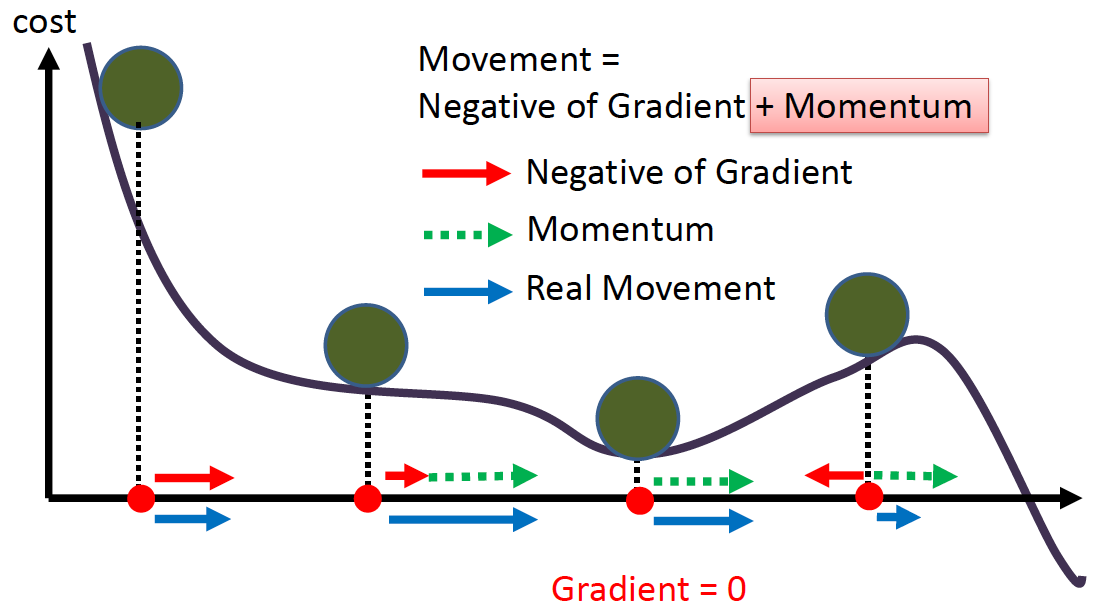

En este caso, nuestro problema es _soltar la bolita verde_ y ver qué sucede. Si no usamos ```momentum```, se quedará atascada en el pequeño valle que encuentra en el tercer punto rojo. Si le damos cierta inercia (```momentum```), logrará subir la cuesta y llegar al verdadero mínimo.

Por cierto, esta técnica se llama **descenso del gradiente** (es una técnica de derivabilidad en varias variables) y es el nombre adecuado para referirnos a la optimiación de los pesos de la red. Es decir:
> Los pesos de una red neuronal se optimizan con la estrategia de descenso del gradiente.

Hay varias versiones del descenso del gradiente, la más famosa (porque lo mejora), es el descenso **estocástico**.

## Optimización

Vamos a buscar la mejor estructura. Teóricamente, con solo una capa oculta se debería alcanzar el óptimo del problema con alguna cantidad determinada de perceptrones. Sin embargo, la práctica nos dice que es mejor añadir varias capas ocultas (de hecho, así nació el concepto de _deep learning_; _deep_ = **profundo**).

Lo primero que vamos a hacer es determinar la estructura de la red. Busquemos el mejor parámetro para una red de tres capas ocultas y 10 perceptrones como máximo por capa.

Para ello, divido el conjunto de entrenamiento en entrenamiento y validación (sí, tendría que haber hecho esto hace mucho tiempo).

In [ ]:
_X_train, X_val, _y_train, y_val = train_test_split(X_train_std, y_train, test_size=0.15, random_state=random_seed)

Ahora, defino la función para evaluar los modelos.

In [ ]:
def evaluate(X_train, y_train, X_test, y_test, model):
  # entrenamiento
  model = model.fit(X_train, y_train)

  # métrica de entrenamiento
  train_score = precision_score(y_train, model.predict(X_train))

  # métrica de testeo
  test_score = precision_score(y_test, model.predict(X_test))

  return model, train_score, test_score

Y ahora, el bucle de entrenamiento.

In [ ]:
import warnings

warnings.filterwarnings("ignore")

best_val_model = []

for x in range(1, 11):
  for y in range(1, 11):
    for z in range(1, 11):
      model, train_score, val_score = evaluate(_X_train, _y_train, X_val, y_val, MLPClassifier(hidden_layer_sizes=(x, y, z), random_state=random_seed))
      metric_importance = train_score * 0.2 + val_score * 0.8
      if not best_val_model or metric_importance > best_val_model[-1]: # problema de maximización
        print(f"Se ha encontrado un nuevo mejor modelo con una estructura {(x, y, z)}. Entrenamiento {train_score} - Validación {val_score}")
        best_val_model = [model, train_score, val_score, metric_importance]

      if metric_importance == 1: break
    if metric_importance == 1: break
  if metric_importance == 1: break

Se ha encontrado un nuevo mejor modelo con una estructura (1, 1, 1). Entrenamiento 0.6243523316062176 - Validación 0.6521739130434783
Se ha encontrado un nuevo mejor modelo con una estructura (1, 1, 4). Entrenamiento 0.9794238683127572 - Validación 0.9777777777777777
Se ha encontrado un nuevo mejor modelo con una estructura (1, 1, 5). Entrenamiento 0.9834710743801653 - Validación 0.9782608695652174
Se ha encontrado un nuevo mejor modelo con una estructura (1, 1, 9). Entrenamiento 0.9874476987447699 - Validación 0.9777777777777777
Se ha encontrado un nuevo mejor modelo con una estructura (1, 4, 10). Entrenamiento 0.9875 - Validación 0.9777777777777777
Se ha encontrado un nuevo mejor modelo con una estructura (1, 5, 2). Entrenamiento 0.9866666666666667 - Validación 1.0
Se ha encontrado un nuevo mejor modelo con una estructura (3, 8, 7). Entrenamiento 0.9877049180327869 - Validación 1.0
Se ha encontrado un nuevo mejor modelo con una estructura (5, 9, 2). Entrenamiento 0.9914529914529915 -

Como puedes ver, a mayor cantidad de perceptrones, mejor resultado. ¿O no?

In [ ]:
model = best_val_model[0]
pred = model.predict(X_test_std)
precision_score(y_test, pred)

0.958904109589041

Una diferencia de más del 4%, bienvenido al **sobreajuste**.

## ¿Qué está pasando aquí? Y, sobre todo, ¿cómo puedo evitar que mi modelo se sobreajuste?

Lo que nos ha pasado en el entrenamiento anterior es el claro ejemplo de un sobreajuste. Hemos entrenado **tanto** el modelo que se ha aprendido los resultados de memoria: funciona perfecto para el entrenamiento y la validación, pero _lo pasa realmente mal_ a la hora de generalizar para el conjunto de testeo.

Las redes neuronales son modelos que **tienden al sobreajuste**, dado que tienen mucha facilidad para dividir el espacio con líneas curvas (no era así con otros modelos, como los perceptrones sueltos). Por ello, hay que tener especial cuidado.

Para evitar el sobreajuste, tenemos que modificar la forma que tenemos de evaluar nuestro modelo. En particular, debemos dejar de usar la métrica de validación para elegir el mejor. Mira:

In [ ]:
import warnings

warnings.filterwarnings("ignore")

best_val_model = []
tol = 0.01 # añado un parámetro de tolerancia para controlar el sobreajuste (1%)
tol_acc = 0 # mide la cantidad de prevenciones. Si llega a 3, paro

for x in range(1, 11):
  for y in range(1, 11):
    for z in range(1, 11):
      model, train_score, val_score = evaluate(_X_train, _y_train, X_val, y_val, MLPClassifier(hidden_layer_sizes=(x, y, z), random_state=random_seed))
      if not best_val_model or train_score > best_val_model[1] + tol: # la tolerancia hace que no se elija un resultado mejor si no supera con creces el anterior
        print(f"Se ha encontrado un nuevo mejor modelo con una estructura {(x, y, z)}. Entrenamiento {train_score} - Validación {val_score}")
        best_val_model = [model, train_score, val_score]
        tol_acc = 0
      elif train_score > best_val_model[1]:
        print("El uso de tolerancia ha impedido que se cambie el mejor modelo")
        tol_acc += 1

      if train_score == 1 or tol_acc == 3: break
    if train_score == 1 or tol_acc == 3: break
  if train_score == 1 or tol_acc == 3: break

Se ha encontrado un nuevo mejor modelo con una estructura (1, 1, 1). Entrenamiento 0.6243523316062176 - Validación 0.6521739130434783
Se ha encontrado un nuevo mejor modelo con una estructura (1, 1, 4). Entrenamiento 0.9794238683127572 - Validación 0.9777777777777777
El uso de tolerancia ha impedido que se cambie el mejor modelo
El uso de tolerancia ha impedido que se cambie el mejor modelo
El uso de tolerancia ha impedido que se cambie el mejor modelo


Veamos los resultados ahora.

In [ ]:
model = best_val_model[0]
pred = model.predict(X_test_std)
precision_score(y_test, pred)

0.9726027397260274

Con esta estructura, disminuye menos de un 1% (respecto al que teníamos).

Esto indica que el modelo **predice** mejor y, ante nuevos datos, previsiblemente funcionará mejor. Lo que necesitamos, por tanto, es conocer la **tolerancia** que tenemos en nuestro problema.

¿Es imporante esa mejora del 2%? ¿Merece la pena el tiempo de entrenamiento (ya has visto que se puede ir de las manos fácilmente)?

Todos estos conceptos los veremos más en detalle en el tema 4, donde hablaremos del _deep learning_ y estos problemas implicarán soluciones directamente inválidas.

# Resumen

En este cuadernillo hemos abordado las redes neuronales de una forma más teórica que práctica. Esto ha sido necesario para entender el funcionamiento básico de estos modelos, dado que en el tema 4 trabajaremos **solo** con redes neuronales y comprender conceptos como el **learning rate**, **momentum** o **sobreajuste** será especialmente importante.